In [1]:
import control
import matplotlib.pyplot as plt
import math
import os
os.environ['PATH']

'/Users/samuelvenzi/.nvm/versions/node/v14.5.0/bin:/Users/samuelvenzi/fabric-samples/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/usr/local/go/bin'

# Exercício de Simulação 1 - Controle Digital
Samuel Venzi Lima Monteiro de Oliveira - 14/0162241

**Texto do exercício**

*Considere um sistema de controle a tempo discreto com realimentação unitária e período de amostragem $T = 1s$ cuja função de transferência a malha aberta é dada por*

<center>$G(z) = \frac{K(0,3679z+0,2642)}{(z-1)(z-0,3679)}$<center/>
    
Primeiramente vamos achar a equação de malha fechada do sistema:
    
<img src="malha-fechada.png">
    
**1) Usando o critério de Jury, determine o valor para qual o sistema a malha fechada é estável;**

<img src="criterio-juri.png">
    

**2) Repita o item anterior usando o critério de Routh modificado;**

<img src="routh-1.png">
<img src="routh-2.png">

**3) Determine o valor de K para o qual o sistema a malha fechada apresenta resposta ao degrau oscilatória com amplitude constante. Determine também a frequência de oscilação correspondente;**



Como visto anteriormente, se usarmos $K = 2.39$ teremos as raízes do sistema no círculo de raio unitário (CRU) o que configura um sistema marginalmente estável, com oscilações de amplitude constante (como será observado a seguir nas simulações).

Se substituirmos $K = 2.39$ na equação característica $P(z)=z^{2} + z(0.3679K - 1.3679) + 0.2642K + 0.3679$ teremos $P(z)=z^{2} + 0.5186z + 1$ cujo as raízes são $z_{1}=0.244309 - 0.969356j$ e $z_{2}=0.244309 + 0.969356j$. Portando, podemos fazer $tan^{-1}(0.9693/0.2443) =  1.3239$ para achar o $\omega_{n}$.


**4) Simule o sistema no Simulink (ou software similar) usando o bloco de função de transferência discreta para referência degrau unitário. Escolha valores de K de modo que a resposta do sistema seja estável, instável e marginalmente estável. Verifique se a frequência de oscilação da resposta marginalmente estável é igual a calculada no item anterior. Apresente o diagrama de simulação e os gráficos das respostas obtidas.**
    
A simulação foi realizada com a biblioteca *open source* `control` disponível para Python pela indisponibilidade do MATLAB no momento. 
    
Foi realizada a simulação da resposta ao degrau unitário para `K = -1, 0.5, 1, 2.39, 5` e é possível observar o mesmo que os critérios de Juri e de Routh modificado mostraram. O sistema é marginalmente estável para $K = 2.39$ e estável para $0 < K < 2.39$. Também é possível observar abaixo de cada gráfico, a localização dos polos e o valores de $\omega_n$. Quando o sistema é marginalmente estável, o valor de $\omega_n = 1.32rad/s$ como calculado no item anterior.

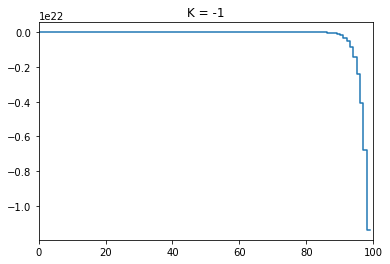

_____Eigenvalue______ Damping___ Frequency_
     1.674                     1     -1.674
   0.06195                     1   -0.06195


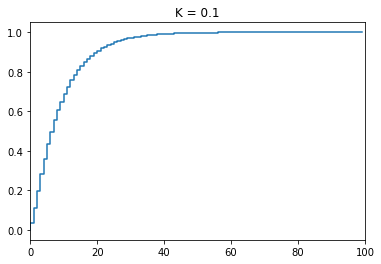

_____Eigenvalue______ Damping___ Frequency_
    0.8861                     1    -0.8861
     0.445                     1     -0.445


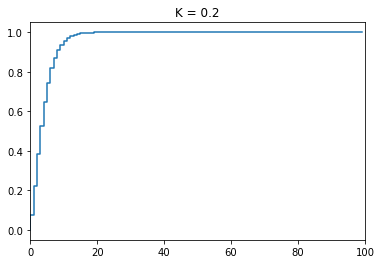

_____Eigenvalue______ Damping___ Frequency_
    0.6472  +0.04386j      0.988     0.4381
    0.6472  -0.04386j      0.988     0.4381


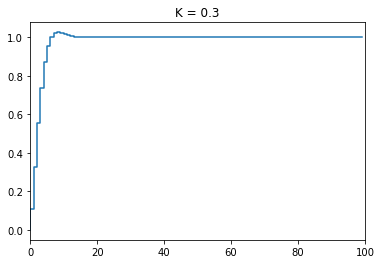

_____Eigenvalue______ Damping___ Frequency_
    0.6288   +0.2276j      0.757     0.5316
    0.6288   -0.2276j      0.757     0.5316


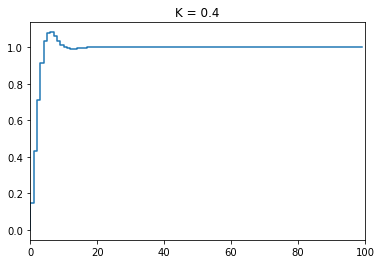

_____Eigenvalue______ Damping___ Frequency_
    0.6104   +0.3178j     0.6142     0.6084
    0.6104   -0.3178j     0.6142     0.6084


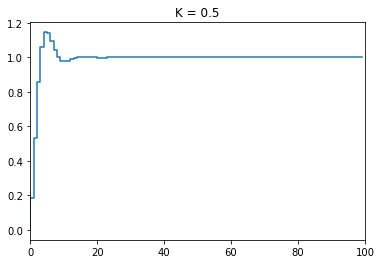

_____Eigenvalue______ Damping___ Frequency_
     0.592   +0.3867j     0.5138     0.6745
     0.592   -0.3867j     0.5138     0.6745


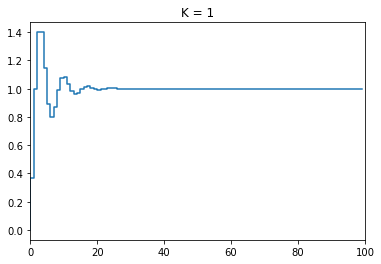

_____Eigenvalue______ Damping___ Frequency_
       0.5   +0.6181j     0.2494     0.9197
       0.5   -0.6181j     0.2494     0.9197


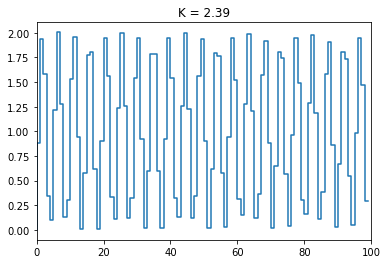

_____Eigenvalue______ Damping___ Frequency_
    0.2443   +0.9694j  0.0002501      1.324
    0.2443   -0.9694j  0.0002501      1.324


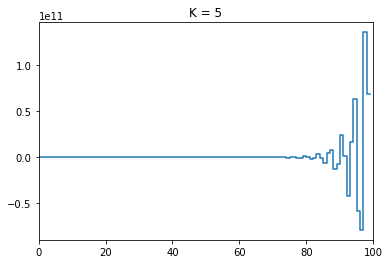

_____Eigenvalue______ Damping___ Frequency_
   -0.2358    +1.278j    -0.1478      1.773
   -0.2358    -1.278j    -0.1478      1.773


In [2]:
# Determinando a FT em malha fechada
z = control.TransferFunction.z
k_values = [-1, 0.1, 0.2, 0.3 , 0.4, 0.5, 1, 2.39, 5]

for k in k_values:
    tf = (k*(0.3679*z + 0.2642))/((z-1)*(z-0.3679))
    tf = control.TransferFunction.feedback(tf)

    # Mostrar gráfico
    plt.figure(1)
    title = "K = " + str(k) 
    plt.title(title)
    plt.xlim(0, 100)
    T, yout = control.step_response(tf, range(0, 100))
    plt.step(T.T, yout.T)
    plt.show(block=False)
    control.damp(tf, True)